In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motorcyclehabitprediction/sample_submission.csv
/kaggle/input/motorcyclehabitprediction/train.csv
/kaggle/input/motorcyclehabitprediction/test.csv


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

### Load the data

In [6]:
train = pd.read_csv('/kaggle/input/motorcyclehabitprediction/train.csv')

In [7]:
train.head()

,Id,time,T_min,T_mean,T_max,P_min,P_mean,P_max,U_min,U_mean,...,N_min,N_mean,N_max,VV_min,VV_mean,VV_max,RRR_min,RRR_mean,RRR_max,y
0,0,2021-04-05 00:00:00+03:00,4.1,5.5000,8.2,747.4,749.212500,751.9,58,72.125000,...,0.60,0.893750,1.00,8.0,9.7500,10.0,0.05,1.025,2.0,1
1,1,2021-04-06 00:00:00+03:00,12.4,17.3750,22.1,766.3,767.962500,769.4,29,45.250000,...,0.00,0.287500,0.60,10.0,10.0000,10.0,0.00,0.000,0.0,1
2,2,2021-04-07 00:00:00+03:00,16.4,18.8000,22.6,759.3,759.885714,760.6,61,72.428571,...,0.25,0.657143,0.95,10.0,10.0000,10.0,0.00,0.000,0.0,0
3,3,2021-04-08 00:00:00+03:00,14.2,17.6375,22.8,758.9,760.975000,762.5,42,68.000000,...,0.25,0.506250,0.95,10.0,10.0000,10.0,0.00,0.150,0.3,0
4,4,2021-04-09 00:00:00+03:00,6.1,7.7875,9.6,750.1,753.612500,757.3,68,80.625000,...,0.50,0.800000,0.95,4.1,9.2625,10.0,2.00,3.500,5.0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        256 non-null    int64  
 1   time      256 non-null    object 
 2   T_min     256 non-null    float64
 3   T_mean    256 non-null    float64
 4   T_max     256 non-null    float64
 5   P_min     256 non-null    float64
 6   P_mean    256 non-null    float64
 7   P_max     256 non-null    float64
 8   U_min     256 non-null    int64  
 9   U_mean    256 non-null    float64
 10  U_max     256 non-null    int64  
 11  Ff_min    256 non-null    int64  
 12  Ff_mean   256 non-null    float64
 13  Ff_max    256 non-null    int64  
 14  N_min     256 non-null    float64
 15  N_mean    256 non-null    float64
 16  N_max     256 non-null    float64
 17  VV_min    256 non-null    float64
 18  VV_mean   256 non-null    float64
 19  VV_max    256 non-null    float64
 20  RRR_min   256 non-null    float6

In [9]:
train.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,256.0,127.500000,74.045031,0.00000,63.750000,127.50000,191.250000,255.0000
T_min,256.0,5.837500,9.746899,-22.00000,0.300000,6.00000,13.700000,23.5000
T_mean,256.0,9.078460,10.471138,-17.62500,3.200000,8.76875,17.331250,29.0000
T_max,256.0,12.396484,11.400748,-13.50000,5.400000,12.10000,21.600000,33.2000
P_min,256.0,759.494141,7.318106,736.60000,755.475000,759.40000,763.925000,781.3000
P_mean,256.0,761.444817,6.964801,741.26250,757.331250,761.25000,765.640625,782.6375
P_max,256.0,763.418359,6.493497,746.00000,759.000000,763.35000,767.200000,784.0000
U_min,256.0,56.753906,18.904040,17.00000,40.000000,58.00000,73.000000,94.0000
U_mean,256.0,71.619350,14.402558,35.87500,61.843750,73.43750,83.156250,94.8750
U_max,256.0,85.484375,10.216084,50.00000,81.000000,88.50000,93.000000,98.0000


### Data EDA

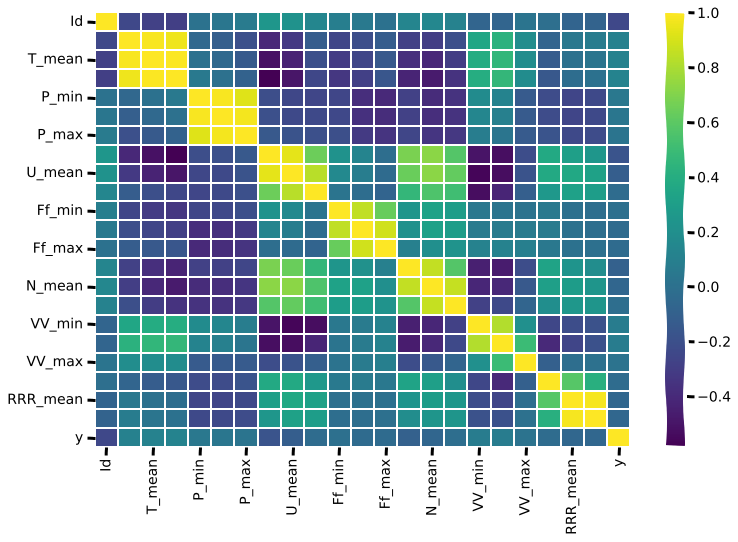

In [10]:
with plt.xkcd():
    sns.heatmap(train.corr(), linewidth=0.01, cmap='viridis')
    fig = plt.gcf()
    fig.set_size_inches(12,8)

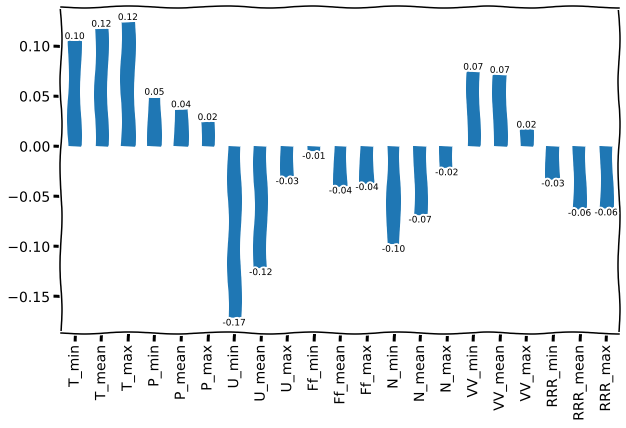

In [11]:
with plt.xkcd():
    train.iloc[:, 2:].corr().loc[:,'y'][:-1].plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i,label_type='edge', fmt='%0.2f', size=9)

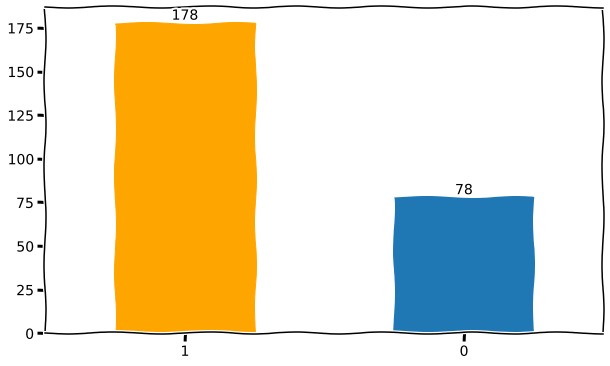

In [12]:
with plt.xkcd():
    train['y'].value_counts().plot(kind='bar')
    ax=plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    ax.get_children()[0].set_color('orange')
    plt.xticks(rotation=360)
    fig= plt.gcf()
    fig.set_size_inches(10,6)

### build the model

In [124]:
X = train.iloc[:,2:-1].copy()
y = train['y'].copy()

In [125]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [126]:
rf = RandomForestClassifier(class_weight='balanced')

In [127]:
rf.fit(Xtrain, ytrain).score(Xval, yval) 

0.8051948051948052

### grid search for the best premeters

In [128]:
params = [{'n_estimators': [30,50,80,100, 150], 'max_features':[4,8,12,16,20]}]

In [129]:
grid = GridSearchCV(rf, params, cv=5)

In [130]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid=[{'max_features': [4, 8, 12, 16, 20],
                          'n_estimators': [30, 50, 80, 100, 150]}])

In [137]:
grid.best_params_

{'max_features': 20, 'n_estimators': 30}

In [136]:
grid.best_score_

0.765079365079365

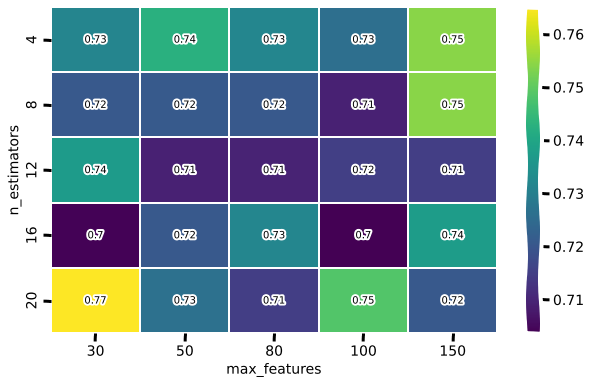

In [133]:
with plt.xkcd():
    sns.heatmap(grid.cv_results_['mean_test_score'].reshape(5,5), yticklabels=[4, 8, 12, 16, 20], xticklabels=[30, 50, 80, 100, 150], cmap='viridis', annot=True,
               linewidth=0.02, annot_kws=dict(size=10, color='black'))
    ax = plt.gca()
    ax.set_xlabel('max_features')
    ax.set_ylabel('n_estimators')
    fig = plt.gcf()
    fig.set_size_inches(10,6)

In [134]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 20,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
best = grid.best_estimator_

In [148]:
best.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_features=20,
                       n_estimators=30)

### load test data and make prediction

In [141]:
test = pd.read_csv('/kaggle/input/motorcyclehabitprediction/test.csv')

In [156]:
Xtest = test.iloc[:,2:].copy()

In [164]:
Xtest = Xtest.dropna()

In [166]:
pred = best.predict(Xtest)

In [173]:
submission = pd.DataFrame({'id':test.dropna()['Id'], 'prediction':pred})

In [174]:
submission

,id,prediction
0,256,1
1,257,1
2,258,1
3,259,1
4,260,1
...,...,...
105,361,0
106,362,1
107,363,1
108,364,0
